In [32]:
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()


# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']


print(df.isnull().sum())

# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))


# 중복 샘플 제거
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))






news    0
code    0
dtype: int64
뉴스 기사의 개수:  3994
뉴스 기사의 개수:  3994


    code  count
0  IT/과학    903
1     사회   1668
2  생활/문화   1423
['공부', '를', '하', '면', '하', 'ㄹ수록', '모르', '는', '것', '이', '많', '다는', '것', '을', '알', '게', '되', 'ㅂ니다', '.']


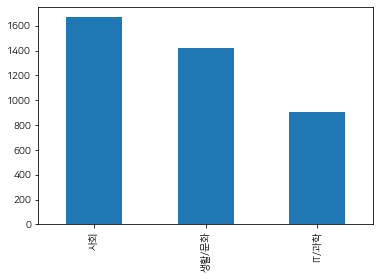

In [57]:
# import matplotlib
# print(matplotlib.__file__)

import matplotlib as plt
from matplotlib import rc
from matplotlib import font_manager as fm
# rc('font', family="Nanum")
font_location='/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
plt.rc('font',family=font_name)
df['code'].value_counts().plot(kind = 'bar')
df['code'].value_counts().plot(kind = 'bar')


print(df.groupby('code').size().reset_index(name = 'count'))


# from konlpy.tag import Mecab
# tokenizer = Mecab()
# from konlpy.tag import Mecab
# tokenizer = Mecab()

from konlpy.tag import Kkma
tokenizer = Kkma()
print(kkma.morphs(u'공부를 하면할수록 모르는게 많다는 것을 알게 됩니다.'))
['공부', '를', '하', '면', '하', 'ㄹ수록', '모르', '는', '것', '이', '많', '다는', '것', '을', '알', '게', '되', 'ㅂ니다', '.']

# stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']



# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data


In [58]:

text_data = preprocessing(df['news'])
print(text_data[0])

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

파주 시청 사진제 공파 주시 파주 시청 사진 제공 파주시 파주 강근주 파 주 시 일 관내 취약 계층 만 가구 대해 정부 긴급 재난 지원금 입금 완료 다파 주 시민 받 긴급 재난 지원금 인 이상 가구 기준 으로 만 원 받 게 되 며 인 가구 만 원 인 가구 만 원 인 가구 만 원 정부 발표 긴급 재난 지원금 파주 시민 지급 금액 다른 이유 국비 지방비 부담 비율 다파 주 시 이미 모든 시민 경기도 파주시 재난 기본 소득 인 당 각 만 원 지급 고 어 시민 국비 지원금 만 지급 며 인 가구 기준 으로 총 지원 금액 파주시 재난 기본소득 만 원 경기도 재난 기본소득 만 원 정부 긴급 재난 지원금 만 원 총 만 원 받 게 된다 취약 계층 아닌 시민 오 월일 부터 소지 고 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 세대주 가족 지원금 일괄 신청 해야 한다 한편 파 주 시 일 김정기 부시장 단장 으로 긴급 재난 지원금 추진 태 스 크 포스 를 구성 해 긴급 재난 지원금 원활 게 지급 될 도록 지원 한다 권 자 재 배포
훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999


In [59]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
print(count_vect)


CountVectorizer()


In [60]:
X_train

['서울 국제 도 서전 코로나 여파 로 미뤄졌 일 대 출판문화 협회 서울 국제 도 서전 개최 연기 되 었 으며 기존 계획 던 오프라인 행사 아닌 온라인 오프라인 연결 새로운 형식 행사 를 준비 중 라고 알렸 애초 서울 국제 도 서전 오 월 일 부터 일 까지 서울 코엑스 에서 열릴 예정 었 그러나 대한 출판문화 협회 서울 국제 도 서전 공식 홈페이지 게재 입장 문 통해 아직 국내 코로나 유행 상황 안심 단계 아닌 만큼 앞 으로 상당 기간 코로나 이전 일상 으로 복귀 기 어렵 다는 정부 브리핑 지속 적 인 생활 속 거리 두기 를 권고 의견 수렴 여 서울 국제 도 서전 형식 일정 변경 기 로 다고 밝혔 수만 명 동시 참석 기존 형식 도서 전 개최 어렵 다고 판단 기 온라인 오프라인 연결 새로운 형식 도서 전 준비 중 라는 설명 도 덧붙였 또 도서 전 형식 내용 변경 위해 준비 기간 좀 더 필요 만큼 기존 월 일정 부득이 게 연기 게 되 었 다며 자세 일정 내용 변경 추후 홈페이지 를 통해 안 내 드리 겠 다고 전하 기 도 도 서전 프로그램 중 밀레 니얼 세대 노동 퀴어 서사 모든 것 페미니즘 리부트 와 인류세 환경 세미나 소규모 참가자 만 모집 해 생 중계 연결 또는 사전 녹화 후 중계 방식 으로 진행 것 고려 중 프랑스 리옹 추리 문학 축제 와 협업 시도 했으나 프랑스 측 참가 불 가능 해진 장르 기획 세션 국내 작가 와 출판사 참여 프로그램 추리 형식 체험 프로그램 으로 바꿀 계획 독자 참여 이벤트 와 특별 전시 국내외 권 교류 를 위한 온라인 프로그램 도 선보일 예정 한편 서울 국제 도 서전 홍보 모델 로 축구 선수 손흥민 방송인 송은이 소설 작가 김 초엽 선정 됐 디지털 국 홍연우 인턴 매일 경제 재 배포',
 '연합뉴스 연합뉴스 서울시 재난 긴급 생활비 로 서울 시민 지급 선불카드 일부 대형 마트 와 온라인 쇼핑몰 에서 결제 가능 것 으로 알려 지 면서 사용 처 대한 혼란 일 고 당초 시 지역 소상 공인 돕 기 위해 대형 마트 나 온라인 에서 사용 제한 된

In [47]:
X_train_counts = count_vect.fit_transform(X_train)
print(X_train_counts)


  (0, 14610)	7
  (0, 2819)	6
  (0, 14634)	7
  (0, 27874)	3
  (0, 18986)	1
  (0, 10446)	1
  (0, 27338)	2
  (0, 31100)	2
  (0, 873)	2
  (0, 19074)	2
  (0, 21234)	1
  (0, 3692)	3
  (0, 1565)	2
  (0, 19730)	3
  (0, 30753)	2
  (0, 17406)	2
  (0, 19785)	3
  (0, 19049)	3
  (0, 14329)	2
  (0, 31118)	6
  (0, 25237)	3
  (0, 8172)	1
  (0, 17904)	1
  (0, 18104)	1
  (0, 12793)	1
  :	:
  (2994, 21612)	1
  (2994, 2498)	1
  (2994, 15327)	1
  (2994, 30172)	1
  (2994, 30203)	1
  (2994, 14558)	1
  (2994, 14633)	1
  (2994, 30213)	1
  (2994, 29298)	2
  (2994, 11008)	3
  (2994, 9709)	1
  (2994, 31415)	1
  (2994, 4166)	3
  (2994, 16383)	1
  (2994, 22759)	1
  (2994, 14196)	1
  (2994, 7932)	1
  (2994, 793)	1
  (2994, 20572)	1
  (2994, 1193)	1
  (2994, 24396)	1
  (2994, 14688)	1
  (2994, 2837)	1
  (2994, 31802)	1
  (2994, 1982)	1


In [38]:
#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf)





  (0, 31486)	0.03468180036355295
  (0, 31328)	0.08714522903990012
  (0, 31309)	0.04267741704275759
  (0, 31287)	0.07751681932977367
  (0, 31118)	0.32427563843454227
  (0, 31100)	0.0906461632681794
  (0, 31087)	0.045519057635256356
  (0, 30753)	0.0741661600851317
  (0, 30729)	0.048601382583305805
  (0, 30680)	0.05600218354629716
  (0, 30391)	0.03199622013388081
  (0, 29986)	0.03010740416081057
  (0, 29755)	0.1483323201702634
  (0, 29725)	0.10809187947818076
  (0, 29245)	0.07027122081409805
  (0, 29058)	0.0370389350897818
  (0, 28843)	0.03690760463609086
  (0, 28677)	0.042266813397783626
  (0, 28013)	0.072610749472719
  (0, 27905)	0.06674350766366433
  (0, 27874)	0.05991860202166898
  (0, 27339)	0.06602015805694865
  (0, 27338)	0.13854389947183726
  (0, 27260)	0.056841384174829646
  (0, 27246)	0.05947626788007378
  :	:
  (2994, 3082)	0.032092206671787235
  (2994, 2837)	0.05413434612301552
  (2994, 2749)	0.029128440566822792
  (2994, 2635)	0.042079503112541106
  (2994, 2570)	0.03795043864

In [39]:
#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [48]:
y_train

2380    생활/문화
23         사회
1042       사회
791        사회
3881    IT/과학
        ...  
1013       사회
4036    IT/과학
1980       사회
3172    생활/문화
3311    생활/문화
Name: code, Length: 2995, dtype: object

In [51]:
def tfidf_vectorizer(data):
  data_counts = count_vect.transform(data)
#   print(data_counts)
  data_tfidf = tfidf_transformer.transform(data_counts)
#   print(data_tfidf)
  return data_tfidf

In [53]:

new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
#print(tfidf_vectorizer(new_sent))
print(clf.predict(tfidf_vectorizer(new_sent)))



['사회']


In [54]:

new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))



['생활/문화']


In [55]:

new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))





['IT/과학']


In [56]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.90      0.74      0.81       236
          사회       0.79      0.91      0.85       422
       생활/문화       0.81      0.76      0.79       341

    accuracy                           0.82       999
   macro avg       0.83      0.80      0.81       999
weighted avg       0.82      0.82      0.82       999

